In [1]:
#global imports
import importlib
import wordembedding_hebrew.create_corpus
import wordembedding_hebrew.word2vec as word2vec

Starting to create wiki corpus


# train word2vec model on hebrew dataset using this sourecode: https://github.com/liorshk/wordembedding-hebrew

In [ ]:
with open('wiki.he.text', 'r',encoding="utf8") as fp:

    line = fp.readline()
    cnt = 1
    while line:
        print("Line {}: {}".format(cnt, line.strip()))
        line = fp.readline()
        cnt += 1 
        break



In [1]:
%%capture
!pip install --upgrade gensim

In [2]:
%%capture
%%time
importlib.reload(wordembedding_hebrew.create_corpus)
sentences=wordembedding_hebrew.create_corpus.Mysentences()

# Corpus Preprocessing 

# Train Model

In [4]:
%time
#importlib.reload(wordembedding_hebrew.word2vec)
model=word2vec.train()

Wall time: 0 ns
3009.4294698238373


In [5]:
model = word2vec.getModel()
print(type(model))

<class 'gensim.models.word2vec.Word2Vec'>


### simple sanity checks

In [6]:
i=0
for word in model.wv.vocab:
    #print(word)
    i=i+1
    if i==15:
        break

#print (model.wv.vocab[u'שלום'])
print (model.wv.doesnt_match(u'ביבי נתניהו  ליכוד עבודה '.split()))
model.wv.similarity(u'ירושלים', u'קהיר')
print (model.wv.doesnt_match(u'סוס כלב אריה צלחת ציפור ליוויתן חתול '.split()))
len(model.wv.vocab)

עבודה
צלחת


C:\Users\Ben\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


515505

In [7]:
 model.wv.most_similar(positive=[u'אישה',u'מלך'], negative=[u'גבר'], topn=1)[0][0]


'מלכת'

In [8]:
model.wv.most_similar(positive=[u'לונדון',u'גרמניה'], negative=[u'ברלין'], topn=1)[0][0]


'בריטניה'

# Plot word2vec - insights

In [9]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
import pandas as pd
from bidi import algorithm as bidialg #package for showing hebrew text right to left


In [10]:
#change figure size
figure(num=None, figsize=(140,100), dpi=80, facecolor='w', edgecolor='k')
plt.style.use('fivethirtyeight')

<Figure size 11200x8000 with 0 Axes>

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


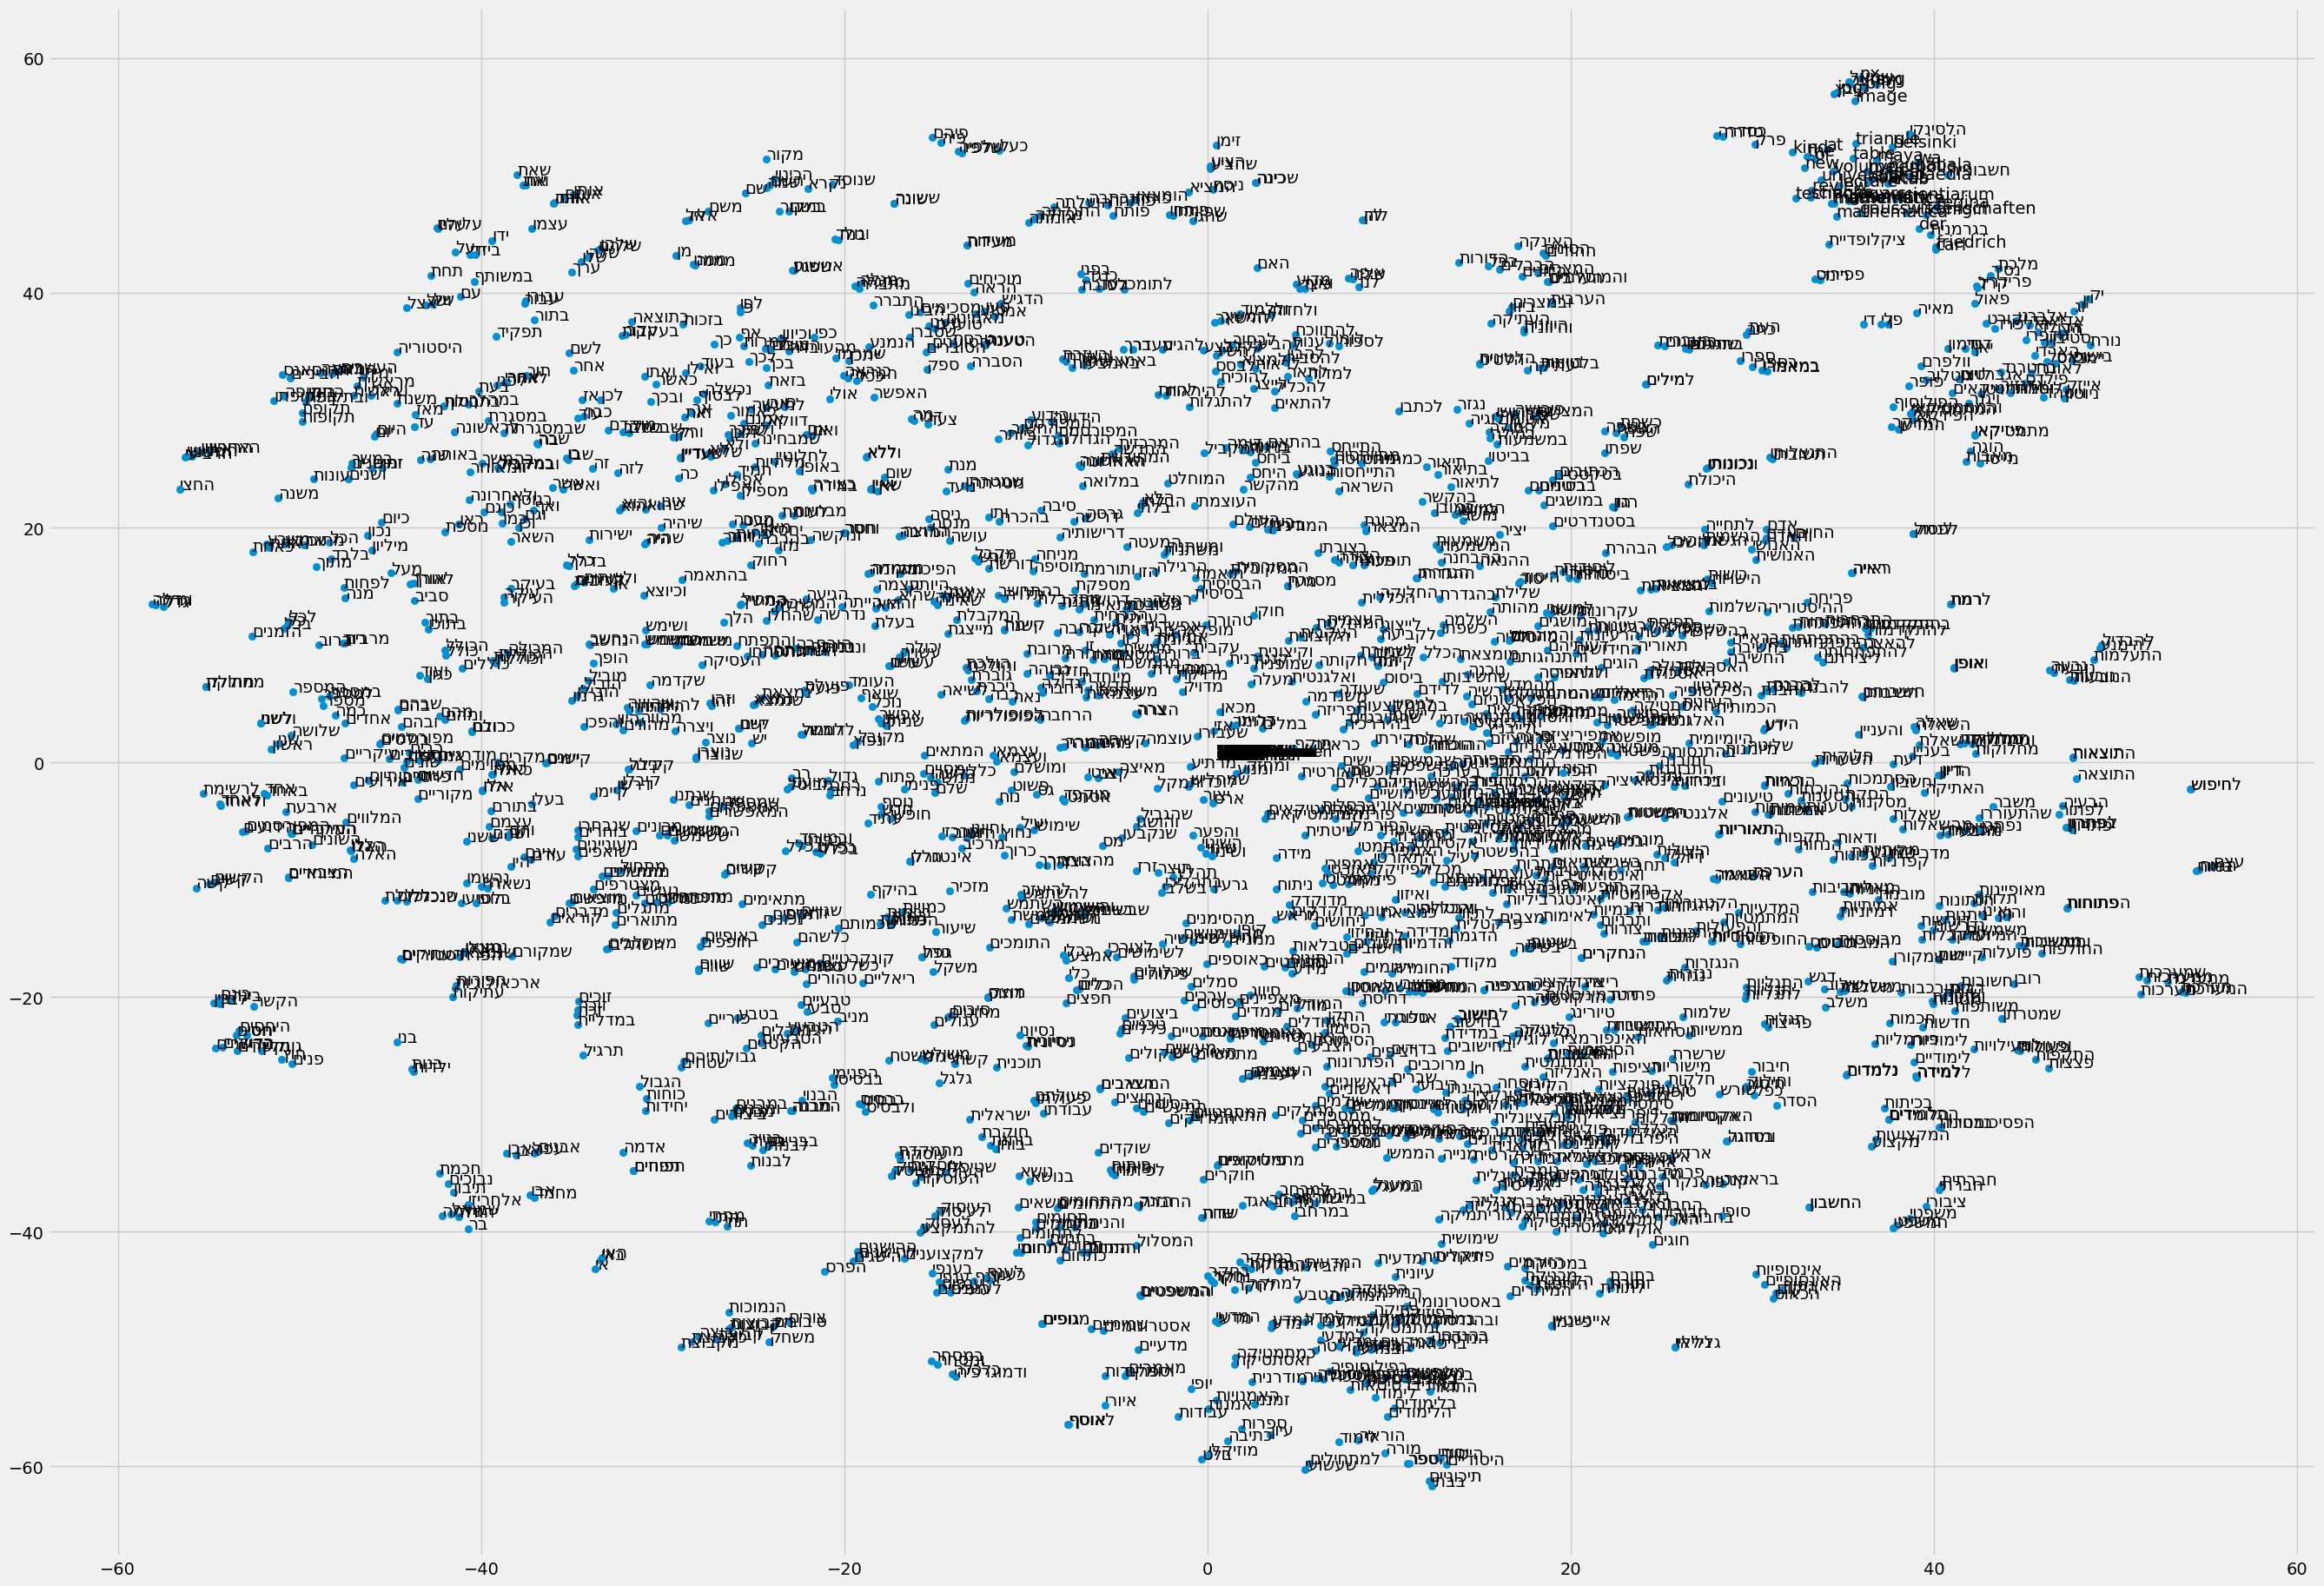

In [11]:
vocab = list(model.wv.vocab)[:2000]
X = model[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure(figsize=(30,22),dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    text = bidialg.get_display(word)
    plt.text(0.5, 0.5, text , name = 'Arial')
    ax.annotate(text, pos)
    ax.annotate
plt.show()